In [4]:
import numpy as np
from astropy.io import fits
from scipy.optimize import curve_fit
import os
import glob
from pylab import *
from math import e
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.ndimage import rotate
import matplotlib.animation as animation
from IPython.display import HTML
import pathlib

In [5]:
notes = "fansoff weekend test"

#add notes here. 

#NOTE: GO TO CELL  

In [14]:
#change to filenames and folder name
foldername_date = "20251114"
foldername = "fansoff"


#change to your path
rootpath = pathlib.Path(r"C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test")
filepath = rootpath / (foldername_date + "_data") / foldername
folderpath_date = rootpath / (foldername_date + "_data")
path1 = (filepath /(foldername +"_fits")).__str__()+"/*.fits"

print(path1)


#path1  = "/Users/anh5866/Desktop/Coding/OGRE/collimated_beam/temp_fits/1-833-stability*11*.fits"
#path1 = "/Users/anh5866/Desktop/Coding/OGRE/collimated_beam/20250917_fits/*.fits"
#path1 = "/Users/anh5866/Desktop/Coding/OGRE/collimated_beam/morning5237_0926_fits/*.fits"

fits_list = glob.glob(path1)
fits_list = np.sort(fits_list,kind='standardsort')

#fits_list = sorted(fits_list, key=lambda x: int(re.search(r'fanoff(\d+)', x).group(1)))


#sorted_list = sorted(fits_list, key=lambda x: int(re.search(r'stability(\d+)', x).group(1)))

#np.set_printoptions(threshold=np.inf)  # show entire array, no truncation


# only keep files that match "stability...123"
#fits_list = [f for f in fits_list if re.search(r'stability(\d+)', f)]

#sorted_list = sorted(fits_list, key=lambda x: int(re.search(r'stability(\d+)', x).group(1)))

for f in fits_list:
    print(f)

#print(fits_list)
#print(len(fits_list))


#print(fits_list[:5])   # first few
#print(fits_list[-5:])  # last few

C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data\fansoff\fansoff_fits/*.fits
C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data\fansoff\fansoff_fits\fansoff0001 25-11-14 16-36-04.fits
C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data\fansoff\fansoff_fits\fansoff0002 25-11-14 16-37-04.fits
C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data\fansoff\fansoff_fits\fansoff0003 25-11-14 16-38-05.fits
C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data\fansoff\fansoff_fits\fansoff0004 25-11-14 16-39-04.fits
C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data\fansoff\fansoff_fits\fansoff0005 25-11-14 16-40-05.fits
C:\Users\jad507\OneDrive - The Pennsylvania State 

In [15]:

'''
def openfits(path):
    
    hdu = fits.open(path)
    data = hdu[0].data    #data
    hdr = hdu[0].header    # headers
    
    #image_data = fits.getdata(path, ext=0)
    #image_data = np.flip(np.transpose(image_data), axis=1) #flip data by 90 degrees
    #image_data = np.flip(image_data, axis=(0, 1)) #flip data by 180 degrees
    
    #data = np.flip(np.transpose(data), axis=1) #flip data by 90 degrees
    data = np.flip(data, axis=(0, 1)) #flip data by 180 degrees
    
    image_data = data
    
    shape = image_data.shape #shape
    
    return hdu, data, hdr, image_data, shape
    
    '''

#use with to close file 

def openfits(path):
    with fits.open(path) as hdu:
        data = hdu[0].data    # numpy array (lazy loaded)
        hdr  = hdu[0].header  # header
        
        # Flip/transform the data
        data = np.flip(data, axis=(0, 1)) 
        
        image_data = data.copy()  # force load into memory
        shape = image_data.shape
    
    return None, image_data, hdr, image_data, shape

In [16]:
hdu = []
data = []
hdr = []
image_data = []
shape = []

for fits_file in fits_list:
    hdu_temp, data_temp, hdr_temp, image_data_temp, shape_temp = openfits(fits_file)
    
    #data_temp = data_temp[0, :, :]
    
    hdu.append(hdu_temp)
    data.append(data_temp)
    hdr.append(hdr_temp)
    image_data.append(image_data_temp)
    shape.append(shape_temp)

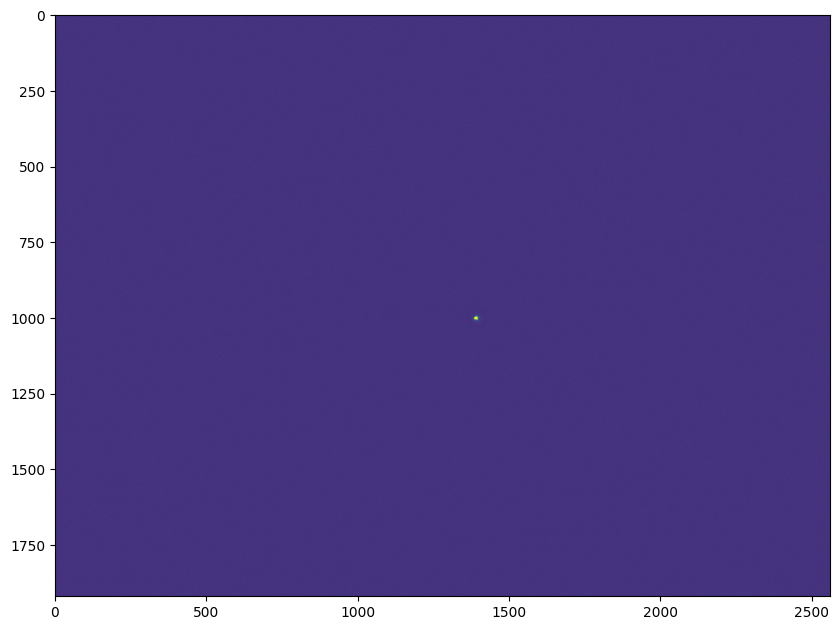

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(data[0], cmap='viridis', vmin = 0, vmax = 100)
#plt.title("title", fontsize=20)
#plt.plot(sum_dat)
#cbar = plt.colorbar()
#cbar.set_label('Ec', fontsize=15)
#plt.colorbar()

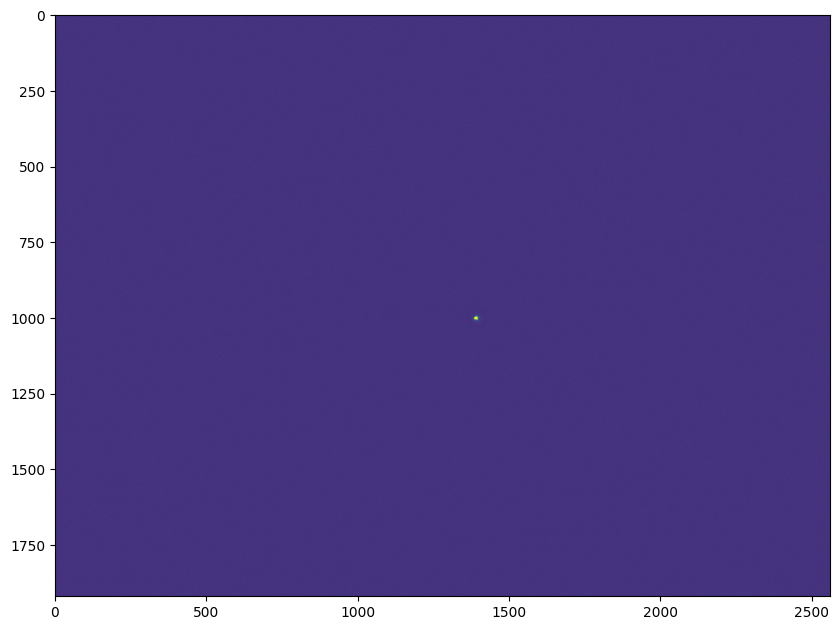

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(data[0], cmap='viridis', vmin=0, vmax=100)

def update(frame):
    im.set_array(data[frame])
    return [im]

#ani = animation.FuncAnimation(fig, update, frames=len(data), interval=200, blit=True)

# show inline in notebook
#HTML(ani.to_jshtml())


In [19]:
print(len(data[0][0]))
print(len(data[0]))
print(data[0].shape)

2560
1920
(1920, 2560)


In [20]:
profiles_x = []
profiles_y = []

for img in data:
    # collapse along y (rows); psf along x
    profiles_x.append(np.sum(img, axis=0))

    # collapse along x (columns); psf along y
    profiles_y.append(np.sum(img, axis=1))

profiles_x = np.array(profiles_x) 
profiles_y = np.array(profiles_y)  


In [21]:
filename = os.path.basename(filepath)

log_path = filepath / (foldername + ".txt")

print(log_path)
print(folderpath_date)

print(folderpath_date / foldername / foldername)

C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data\fansoff\fansoff.txt
C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data
C:\Users\jad507\OneDrive - The Pennsylvania State University\Pictures\Reverse Telescope Test\20251114_data\fansoff\fansoff


In [22]:
import pandas as pd

# --- 2. Load the timestamp file ---
# Your text file isn’t quite a CSV, so we’ll parse it carefully
df_times = pd.read_csv(
    log_path,
    sep=r'\t+',              # split by tabs
    engine='python',
    skiprows=2,              # skip the first two header lines
    names=["Filename", "Creation Date"]
)

# Strip whitespace just in case
df_times["Filename"] = df_times["Filename"].str.strip()
df_times["Creation Date"] = df_times["Creation Date"].str.strip()

Animation size has reached 21065293 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


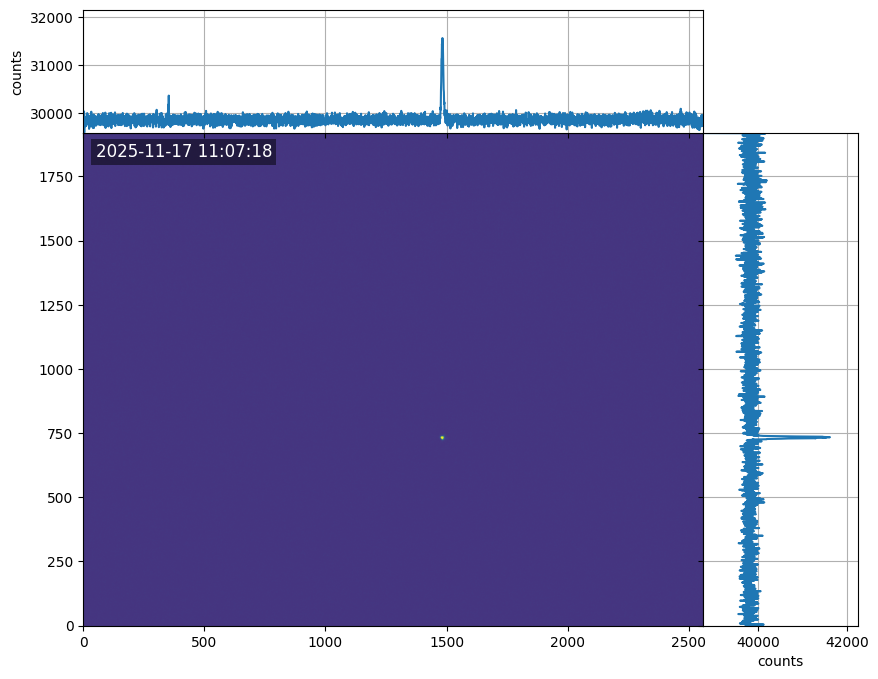

In [23]:

# --- 3. Create figure and subplots ---
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 2, width_ratios=[4,1], height_ratios=[1,4], wspace=0.0, hspace=0.0)

ax_img = fig.add_subplot(gs[1,0])
ax_x   = fig.add_subplot(gs[0,0], sharex=ax_img)
ax_y   = fig.add_subplot(gs[1,1], sharey=ax_img)
fig.add_subplot(gs[0,1]).axis("off")

im = ax_img.imshow(data[0], cmap="viridis", origin="lower", vmin=0, vmax=100, aspect="auto")

profile_x = np.sum(data[0], axis=0)
profile_y = np.sum(data[0], axis=1)

line_x, = ax_x.plot(np.arange(data[0].shape[1]), profile_x)
line_y, = ax_y.plot(profile_y, np.arange(data[0].shape[0]))

ax_x.set_xlim(ax_img.get_xlim())
ax_y.set_ylim(ax_img.get_ylim())

ax_x.tick_params(labelbottom=False)
ax_y.tick_params(labelleft=False)
ax_x.set_ylabel("counts")
ax_y.set_xlabel("counts")
ax_x.grid()
ax_y.grid()

max_x = max(np.sum(img, axis=0).max() for img in data)
max_y = max(np.sum(img, axis=1).max() for img in data)
min_x = max(np.sum(img, axis=0).min() for img in data)
min_y = max(np.sum(img, axis=1).min() for img in data)

ax_x.set_ylim(min_x - 200, max_x - 200)
ax_y.set_xlim(min_y - 200, max_y)

# --- 4. Add a text label for the creation date ---
timestamp_text = ax_img.text(
    0.02, 0.98, "", 
    transform=ax_img.transAxes, 
    color="white", 
    fontsize=12, 
    verticalalignment="top",
    bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=3)
)

# --- 5. Update function ---
def update(frame):
    img = data[frame]
    im.set_array(img)

    profile_x = np.sum(img, axis=0)
    profile_y = np.sum(img, axis=1)
    line_x.set_ydata(profile_x)
    line_y.set_xdata(profile_y)

    # Get matching creation date from the DataFrame
    if frame < len(df_times):
        timestamp = df_times.iloc[frame]["Creation Date"]
        timestamp_text.set_text(f"{timestamp}")
    else:
        timestamp_text.set_text("")

    return [im, line_x, line_y, timestamp_text]

ani = animation.FuncAnimation(fig, update, frames=len(data), interval=200, blit=True)
HTML(ani.to_jshtml())

# --- 6. (Optional) Save video ---
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save(folderpath_date / foldername / (foldername + ".mp4"), writer=writer)


In [24]:
'''
fig = plt.figure(figsize=(10,8))

#2x2 grid equal sizes
gs = fig.add_gridspec(2, 2, width_ratios=[4,1], height_ratios=[1,4], wspace=0.0, hspace=0.0)

ax_img = fig.add_subplot(gs[1,0])
ax_x   = fig.add_subplot(gs[0,0], sharex=ax_img)  # x (top)
ax_y   = fig.add_subplot(gs[1,1], sharey=ax_img)  # y (right)

#hide the empty top-right cell
fig.add_subplot(gs[0,1]).axis("off")

#primary image
im = ax_img.imshow(data[0], cmap="viridis", origin="lower", vmin=0, vmax=100, aspect="auto")

#profiles
profile_x = np.sum(data[0], axis=0)
profile_y = np.sum(data[0], axis=1)

line_x, = ax_x.plot(np.arange(data[0].shape[1]), profile_x)          # x psf
line_y, = ax_y.plot(profile_y, np.arange(data[0].shape[0]))          # y psf

#sync axes so they align
ax_x.set_xlim(ax_img.get_xlim())
ax_y.set_ylim(ax_img.get_ylim())

#ticks
ax_x.tick_params(labelbottom=False)
ax_y.tick_params(labelleft=False)

ax_x.set_ylabel("counts")
ax_y.set_xlabel("counts")

ax_x.grid()
ax_y.grid()


# compute global maxima across ALL frames
max_x = max(np.sum(img, axis=0).max() for img in data)
max_y = max(np.sum(img, axis=1).max() for img in data)

min_x = max(np.sum(img, axis=0).min() for img in data)
min_y = max(np.sum(img, axis=1).min() for img in data)

ax_x.set_ylim(min_x-200, max_x-200)   # add headroom
ax_y.set_xlim(min_y-200, max_y)

def update(frame):
    img = data[frame]
    im.set_array(img)

    profile_x = np.sum(img, axis=0)
    profile_y = np.sum(img, axis=1)

    line_x.set_ydata(profile_x)
    line_y.set_xdata(profile_y)
    return [im, line_x, line_y]

ani = animation.FuncAnimation(fig, update, frames=len(data), interval=200, blit=True)

HTML(ani.to_jshtml())

#comment out below to not save video 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

ani.save("psf_movie_bigshakeA.mp4", writer=writer)


'''

'\nfig = plt.figure(figsize=(10,8))\n\n#2x2 grid equal sizes\ngs = fig.add_gridspec(2, 2, width_ratios=[4,1], height_ratios=[1,4], wspace=0.0, hspace=0.0)\n\nax_img = fig.add_subplot(gs[1,0])\nax_x   = fig.add_subplot(gs[0,0], sharex=ax_img)  # x (top)\nax_y   = fig.add_subplot(gs[1,1], sharey=ax_img)  # y (right)\n\n#hide the empty top-right cell\nfig.add_subplot(gs[0,1]).axis("off")\n\n#primary image\nim = ax_img.imshow(data[0], cmap="viridis", origin="lower", vmin=0, vmax=100, aspect="auto")\n\n#profiles\nprofile_x = np.sum(data[0], axis=0)\nprofile_y = np.sum(data[0], axis=1)\n\nline_x, = ax_x.plot(np.arange(data[0].shape[1]), profile_x)          # x psf\nline_y, = ax_y.plot(profile_y, np.arange(data[0].shape[0]))          # y psf\n\n#sync axes so they align\nax_x.set_xlim(ax_img.get_xlim())\nax_y.set_ylim(ax_img.get_ylim())\n\n#ticks\nax_x.tick_params(labelbottom=False)\nax_y.tick_params(labelleft=False)\n\nax_x.set_ylabel("counts")\nax_y.set_xlabel("counts")\n\nax_x.grid()\nax_y.

In [25]:
# example fit for just first frame


def gaussian(x, amp, mu, sigma, offset):
    return amp * np.exp(-0.5 * ((x - mu)/sigma)**2) + offset


img = data[0]

profile_x = np.sum(img, axis=0)
profile_y = np.sum(img, axis=1)

x_vals = np.arange(profile_x.size)
p0_x = [profile_x.max(), profile_x.argmax(), 5, np.median(profile_x)]  # initial guess
popt_x, pcov_x = curve_fit(gaussian, x_vals, profile_x, p0=p0_x)

y_vals = np.arange(profile_y.size)
p0_y = [profile_y.max(), profile_y.argmax(), 5, np.median(profile_y)]
popt_y, pcov_y = curve_fit(gaussian, y_vals, profile_y, p0=p0_y)

# popt_x = [amp, mu, sigma, offset] for x-profile
# popt_y = [amp, mu, sigma, offset] for y-profile

# Generate smooth fit curves
x_fit = gaussian(x_vals, *popt_x)
y_fit = gaussian(y_vals, *popt_y)

print("X fit:", popt_x)
print("Y fit:", popt_y)


X fit: [1.63681370e+03 1.39045265e+03 3.99787575e+00 2.84170731e+04]
Y fit: [1.83433627e+03 1.00287832e+03 3.58953000e+00 3.78893778e+04]


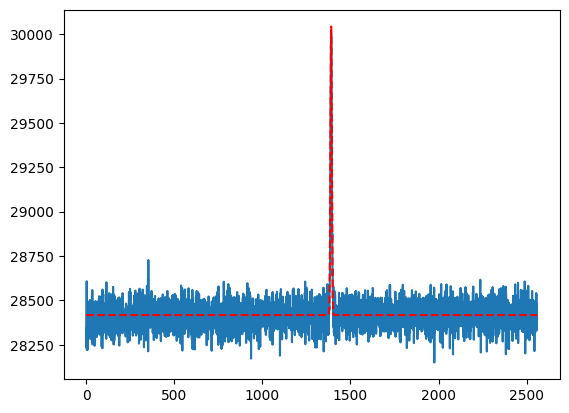

In [26]:
plot(np.arange(data[0].shape[1]), profile_x) 
plot(x_vals, x_fit, 'r--', label="Gaussian fit")

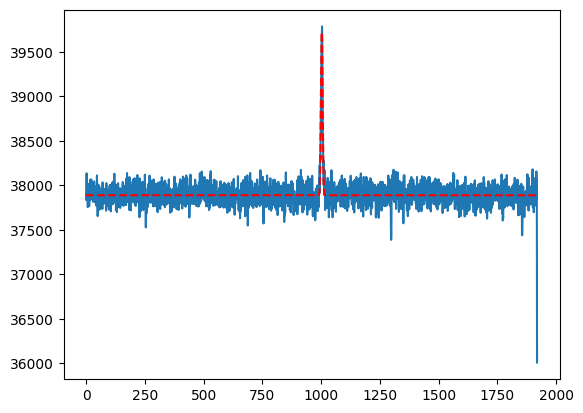

In [27]:
plot(np.arange(data[0].shape[0]), profile_y) 
plot(y_vals, y_fit, 'r--', label="Gaussian fit")

In [28]:
def gaussian(x, amp, mu, sigma, offset):
    return amp * np.exp(-0.5 * ((x - mu)/sigma)**2) + offset

#initialize
amps_x, mus_x, sigmas_x, offsets_x = [], [], [], []
amps_y, mus_y, sigmas_y, offsets_y = [], [], [], []

for img in data:
    # collapse
    profile_x = np.sum(img, axis=0)
    profile_y = np.sum(img, axis=1)

    #fit x
    x_vals = np.arange(profile_x.size)
    p0_x = [profile_x.max(), profile_x.argmax(), 5, np.median(profile_x)]
    try:
        popt_x, _ = curve_fit(gaussian, x_vals, profile_x, p0=p0_x)
    except RuntimeError:
        popt_x = [np.nan]*4

    amps_x.append(popt_x[0])
    mus_x.append(popt_x[1])
    sigmas_x.append(popt_x[2])
    offsets_x.append(popt_x[3])

    #fit y
    y_vals = np.arange(profile_y.size)
    p0_y = [profile_y.max(), profile_y.argmax(), 5, np.median(profile_y)]
    try:
        popt_y, _ = curve_fit(gaussian, y_vals, profile_y, p0=p0_y)
    except RuntimeError:
        popt_y = [np.nan]*4

    amps_y.append(popt_y[0])
    mus_y.append(popt_y[1])
    sigmas_y.append(popt_y[2])
    offsets_y.append(popt_y[3])

#to np.array
amps_x = np.array(amps_x)
mus_x = np.array(mus_x)
sigmas_x = np.array(sigmas_x)
offsets_x = np.array(offsets_x)

amps_y = np.array(amps_y)
mus_y = np.array(mus_y)
sigmas_y = np.array(sigmas_y)
offsets_y = np.array(offsets_y)


In [29]:
#need to add cut to data for bad fits and NANs 

def filter_fits(amps_x, mus_x, sigmas_x, offsets_x,
                amps_y, mus_y, sigmas_y, offsets_y,
                fwhm_min, fwhm_max):
    
    fwhm_x = 2.355 * sigmas_x
    fwhm_y = 2.355 * sigmas_y

    #mask for NANs & infs
    finite_mask = (
        np.isfinite(amps_x) & np.isfinite(mus_x) & np.isfinite(sigmas_x) & np.isfinite(offsets_x) &
        np.isfinite(amps_y) & np.isfinite(mus_y) & np.isfinite(sigmas_y) & np.isfinite(offsets_y)
    )

    #mask for FWHM
    fwhm_mask = (
        (fwhm_x > fwhm_min) & (fwhm_x < fwhm_max) &
        (fwhm_y > fwhm_min) & (fwhm_y < fwhm_max)
    )

    #both 
    mask = finite_mask & fwhm_mask

    return (amps_x[mask], mus_x[mask], sigmas_x[mask], offsets_x[mask],
            amps_y[mask], mus_y[mask], sigmas_y[mask], offsets_y[mask],
            fwhm_x[mask], fwhm_y[mask], mask)


In [30]:
filtered = filter_fits(amps_x, mus_x, sigmas_x, offsets_x,
                       amps_y, mus_y, sigmas_y, offsets_y,
                       fwhm_min=1, fwhm_max=100)

filtered

(array([1636.81369763, 1693.99335113, 1629.04369426, ..., 1601.69198047,
        1564.45242196, 1669.37785498], shape=(3991,)),
 array([1390.45265362, 1390.86342995, 1390.13780176, ..., 1484.34214197,
        1483.92585219, 1482.87027386], shape=(3991,)),
 array([3.99787575, 3.76517121, 4.13989335, ..., 4.63870712, 4.21554946,
        4.02689538], shape=(3991,)),
 array([28417.07311781, 28450.49815868, 28372.550051  , ...,
        29850.68019664, 29835.8889531 , 29865.06149104], shape=(3991,)),
 array([1834.33626758, 1870.95865175, 1857.89769136, ..., 2084.59138454,
        1935.86062053, 1843.80943533], shape=(3991,)),
 array([1002.87831701, 1003.76007496, 1002.49011662, ...,  732.2316517 ,
         731.14005149,  733.14282077], shape=(3991,)),
 array([3.58953   , 3.49766324, 3.41659772, ..., 3.52748273, 3.26749289,
        3.55581445], shape=(3991,)),
 array([37889.37778338, 37933.78107626, 37830.58422037, ...,
        39801.00669772, 39781.53726375, 39820.29892335], shape=(3991,)),


In [31]:
(amps_x_f, mus_x_f, sigmas_x_f, offsets_x_f,
 amps_y_f, mus_y_f, sigmas_y_f, offsets_y_f,
 fwhm_x_f, fwhm_y_f, mask) = filtered

print(len(amps_x_f))
print(len(fwhm_y_f))

3991
3991


In [32]:
#recenter relative to first frame
mu_x_rel = mus_x_f - mus_x_f[0]
mu_y_rel = mus_y_f - mus_y_f[0]

frames = np.arange(len(mu_x_rel))

print(mu_x_rel)
print(mu_y_rel)

[ 0.          0.41077633 -0.31485186 ... 93.88948835 93.47319857
 92.41762024]
[   0.            0.88175795   -0.38820039 ... -270.64666531 -271.73826552
 -269.73549624]


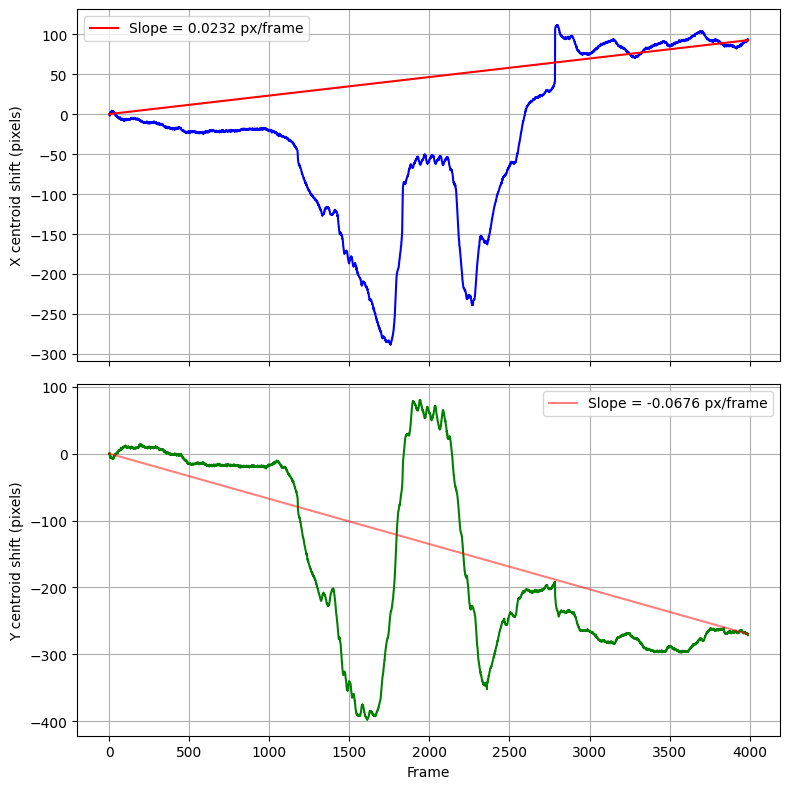

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

axs[0].plot(frames, mu_x_rel, color='blue')
axs[0].set_ylabel("X centroid shift (pixels)")
#axs[0].set_title("X centroid over time")
axs[0].grid(True)
linex = axs[0].plot(
    [frames[0], frames[-1]],
    [mu_x_rel[0], mu_x_rel[-1]],
    color='red'
)[0]   

#slope
slopex = (mu_x_rel[-1] - mu_x_rel[0]) / (frames[-1] - frames[0])


axs[0].legend([linex], [f"Slope = {slopex:.4f} px/frame"])


axs[1].plot(frames, mu_y_rel, color='green')
axs[1].set_xlabel("Frame")
axs[1].set_ylabel("Y centroid shift (pixels)")
#axs[1].set_title("Y centroid over time")
axs[1].grid(True)
liney = axs[1].plot(
    [frames[0], frames[-1]],
    [mu_y_rel[0], mu_y_rel[-1]],
    color='red', alpha=0.5
)[0]   #

#slope
slopey = (mu_y_rel[-1] - mu_y_rel[0]) / (frames[-1] - frames[0])


axs[1].legend([liney], [f"Slope = {slopey:.4f} px/frame"])

plt.tight_layout()
plt.show()

fig.savefig(folderpath_date / (foldername + "/" + foldername + "_position"), dpi=300, bbox_inches="tight")

In [35]:
# Compute FWHM
FWHM_factor = 2 * np.sqrt(2 * np.log(2))  # ~2.35482
FWHM_x = sigmas_x_f * FWHM_factor
FWHM_y = sigmas_y_f * FWHM_factor

frames = np.arange(len(FWHM_x))

print(FWHM_x)
print(FWHM_y)

[ 9.41427794  8.86630063  9.74870385 ... 10.92332051  9.92686036
  9.48261395]
[8.4526972  8.23636752 8.04547279 ... 8.30658704 7.69435775 8.37330313]


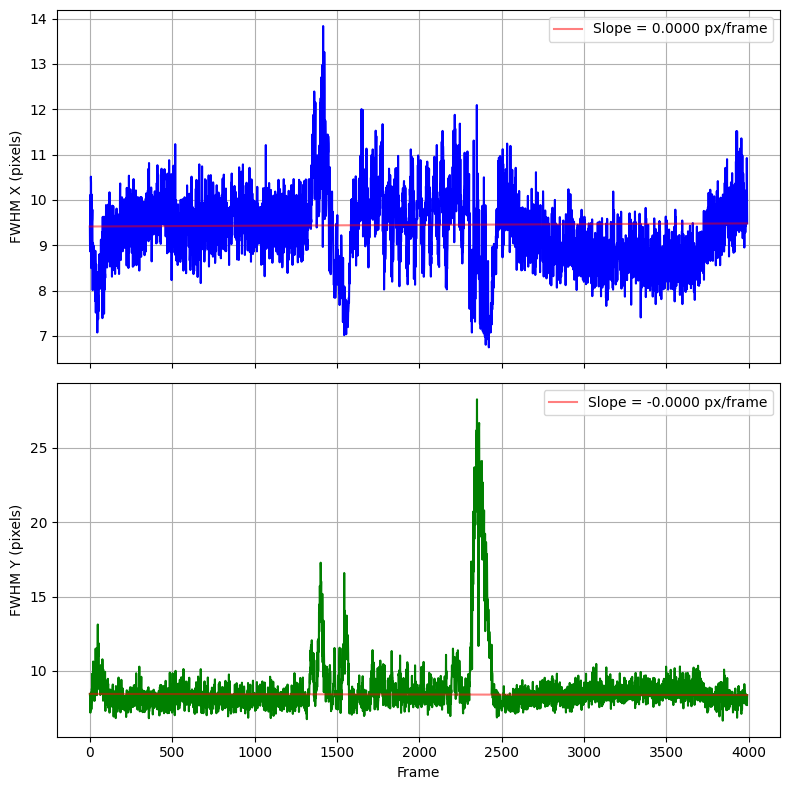

In [38]:
# Plot X and Y FWHM separately
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

#x FWHM
axs[0].plot(frames, FWHM_x, color='blue')
axs[0].set_ylabel("FWHM X (pixels)")
#axs[0].set_title("X FWHM over frames")
axs[0].grid(True)
axs[0].grid(True)
linexfwhm = axs[0].plot(
    [frames[0], frames[-1]],
    [FWHM_x[0], FWHM_x[-1]],
    color='red', alpha=0.5
)[0]   

# slope
slopexfwhm = (FWHM_x[-1] - FWHM_x[0]) / (frames[-1] - frames[0])

axs[0].legend([linexfwhm], [f"Slope = {slopexfwhm:.4f} px/frame"])


#y FWHM
axs[1].plot(frames, FWHM_y, color='green')
axs[1].set_xlabel("Frame")
axs[1].set_ylabel("FWHM Y (pixels)")
#axs[1].set_title("Y FWHM over frames")
axs[1].grid(True)
lineyfwhm = axs[1].plot(
    [frames[0], frames[-1]],
    [FWHM_y[0], FWHM_y[-1]],
    color='red', alpha=0.5
)[0]  

#slope
slopeyfwhm = (FWHM_y[-1] - FWHM_y[0]) / (frames[-1] - frames[0])

axs[1].legend([lineyfwhm], [f"Slope = {slopeyfwhm:.4f} px/frame"])


plt.tight_layout()
plt.show()


fig.savefig(folderpath_date / (foldername + "/" + foldername + "_FWHM"), dpi=300, bbox_inches="tight")


In [25]:
print(np.mean(mu_x_rel))
print(np.mean(mu_y_rel))
print(np.std(mu_x_rel))
print(np.std(mu_y_rel))

-145.42548894265934
22.598489152656917
51.51043843406341
27.56711015379887


In [39]:
print(np.mean(FWHM_x))
print(np.mean(FWHM_y))
print(np.std(FWHM_x))
print(np.std(FWHM_y))

9.294831427602741
8.788521585761147
0.8022642249397317
2.075967573711229


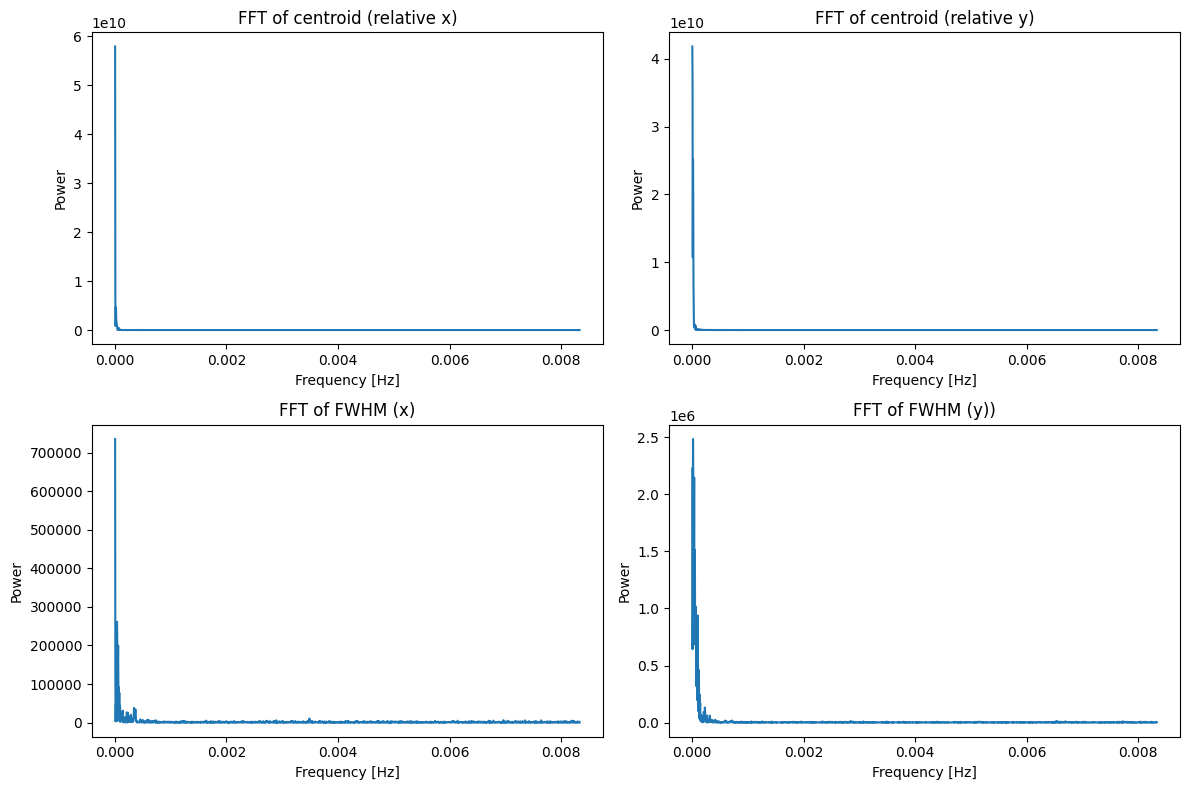

In [45]:
def compute_fft(signal, dt):
    N = len(signal)
    fft_vals = np.fft.fft(signal - np.mean(signal))  # remove DC offset
    freqs = np.fft.fftfreq(N, d=dt)
    mask = freqs > 0
    return freqs[mask], np.abs(fft_vals[mask])**2


####################################################
#############
##CHANGE THIS DEPENDING ON FRAME RATE OF TEST
## comment out either top two or bottom two 
#############

# frame_rate = 52.37
# dt = 1.0 / frame_rate

frame_rate = 1/60
dt = 60.0


####################################################

#ffts
freqs_x, power_mu_x   = compute_fft(mu_x_rel, dt)
freqs_y, power_mu_y   = compute_fft(mu_y_rel, dt)
freqs_fx, power_fwhm_x = compute_fft(FWHM_x, dt)
freqs_fy, power_fwhm_y = compute_fft(FWHM_y, dt)


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].plot(freqs_x, power_mu_x)
axs[0,0].set_title("FFT of centroid (relative x)")
axs[0,0].set_xlabel("Frequency [Hz]")
axs[0,0].set_ylabel("Power")

axs[0,1].plot(freqs_y, power_mu_y)
axs[0,1].set_title("FFT of centroid (relative y)")
axs[0,1].set_xlabel("Frequency [Hz]")
axs[0,1].set_ylabel("Power")

axs[1,0].plot(freqs_fx, power_fwhm_x)
axs[1,0].set_title("FFT of FWHM (x)")
axs[1,0].set_xlabel("Frequency [Hz]")
axs[1,0].set_ylabel("Power")

axs[1,1].plot(freqs_fy, power_fwhm_y)
axs[1,1].set_title("FFT of FWHM (y))")
axs[1,1].set_xlabel("Frequency [Hz]")
axs[1,1].set_ylabel("Power")

plt.tight_layout()
plt.show()


fig.savefig(folderpath_date / foldername / (foldername + "_FFT"), dpi=300, bbox_inches="tight")

In [46]:
filename = os.path.basename(filepath)
num_data = len(fits_list)
    
creation_date_start = str(fits_list[0][-22:-5])
creation_date_stop = str(fits_list[-1][-22:-5])



In [47]:
# csv_path = "/Users/anh5866/Desktop/Coding/OGRE/collimated_beam/collimated_beam_entry.xlsx"

# Load existing Excel
# df = pd.read_excel(csv_path, engine='openpyxl')

# Prepare new row as a dictionary
new_row = {
    'filename': filename,
    'number of frames': num_data,
    'start time': creation_date_start,
    'stop time': creation_date_stop,
    'notes': notes,
    'frame rate': frame_rate,
    'x position': np.mean(mu_x_rel*0.15),
    'x position std': np.std(mu_x_rel*0.15),
    'y position': np.mean(mu_y_rel*0.15),
    'y position std': np.std(mu_y_rel*0.15),
    'FWHM x': np.mean(FWHM_x*0.15),
    'FWHM x std': np.std(FWHM_x*0.15),
    'FWHM y': np.mean(FWHM_y*0.15),
    'FWHM y std': np.std(FWHM_y*0.15)
}
print(new_row)
# Append new row
# df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save back
# df.to_excel(csv_path, index=False, engine='openpyxl')


{'filename': 'fansoff', 'number of frames': 3991, 'start time': '25-11-14 16-36-04', 'stop time': '25-11-17 11-07-18', 'notes': 'fansoff weekend test', 'frame rate': 0.016666666666666666, 'x position': np.float64(-3.8543668802268316), 'x position std': np.float64(15.167372475261919), 'y position': np.float64(-24.139504346032886), 'y position std': np.float64(20.67304873522766), 'FWHM x': np.float64(1.3942247141404105), 'FWHM x std': np.float64(0.12033963374095977), 'FWHM y': np.float64(1.3182782378641722), 'FWHM y std': np.float64(0.31139513605668434)}
